In [10]:

import math
import pandas as pd #package for reading data
import numpy as np
import graphlib
import statistics
import matplotlib.pyplot as plt #package for plots
import gmplot 
from scipy import signal
from scipy import integrate

def gather_function(time_data,data1,data2):
  i = 0
  x = 0
  while i < len(time_data) - 1:
    for n in gps_time:
      if(time_data[i] <= n <=time_data[i+1]):
        data1.append(latitude[x])
        data2.append(longitude[x])
        x = x + 1
    i = i + 1 
  return [data1,data2]

def speedfn (x,y):
  i = 0
  time = y
  #value = reduce_bar
  value = x
  speed = []
  while i <len(x)-1:
    x0, x1 = time.iat[i], time.iat[i+1]
    t = time.iat[i]
    y0, y1 = value[i], value[i+1]
    val = y1-y0
    
    if val < 0 :  # somehow abs() doesn't work
      val *= -1
    speed.append((x1-x0)*(val))
    i = i + 1
  speed.append(0)
  return speed

#main function
def der(x,y):
  """
  derivative of column y of sheet x
  """
  i = 0
  time = x['time']
  #value = reduce_bar
  value = x[y]
  slopes = []
  aslopes = []
  times = []

  while i < len(x)-1: 
    x0, x1 = time.iat[i], time.iat[i+1]
    t = time.iat[i]
    y0, y1 = value[i], value[i+1]
    numerator = y1-y0
    num = numerator
    if numerator < 0 :  # somehow abs() doesn't work
      numerator *= -1
    slope = numerator/(x1-x0)
    #slope = numerator
    aslope = num /(x1-x0)
    #aslope = num
    slopes.append(slope)
    times.append(t)
    aslopes.append(aslope)
    i+=1
  slopes.append(0)
  times.append(0)
  aslopes.append(0)
  return [slopes,times,aslopes]

def complicated(x,y):
  #x: vel , y: rounded time
  # return: mean of vel for same rounded time , corresponding time
  a = []
  b = []
  c = []
  d = []
  count = 0
  counts = []
  n = 0
  while n < max(y) :
    for i in y:
      if i == n:
        a.append(x[y.index(i)])
        c.append(i)
        count = count + 1 
    n = n + 1
    counts.append(count)
    if(len(a) == 0):
      b.append(0)
    else:
      b.append(sum(a)/len(a))
      d.append(sum(c)/len(c))
    count = 0
    a.clear()
    c.clear()
  # for i in y:
  #     if i == n:
  #       a.append(x[y.index(i)])
  #       count = count + 1 
  # n = n + 1
  # counts.append(count)
  # count = 0
  # print(sum(a))
  # print(len(a))
  # print(sum(a)/len(a))
  # b.append(mean(a))
  # a.clear()
  return [b,d]

#data 
gps_data = pd.read_csv('GPS.csv')
pressure_data = pd.read_csv('Pressure.csv')
pressure_range = pd.read_csv("Pressure_Range.csv")
acceleration_data = pd.read_csv("Acceleration.csv")
# gps_data = pd.read_csv('Data/newData/stairs+flat_gps.csv')
# pressure_data = pd.read_csv('Data/newData/stairs+flat_pressure.csv')
# pressure_range = pd.read_csv("Pressure_Range.csv")
# acceleration_data = pd.read_csv("Data/newData/stairs+flat_acc.csv")

latitude = gps_data["Latitude"]
longitude = gps_data["Longitude"]
gps_time = gps_data["time"]
gps_speed = gps_data["Speed"]
altitude = gps_data["Altitude"]

pressure_r = pressure_range["Pressure"]
pressure_r_t = pressure_range["time"]
deri_pr = der(pressure_range,"Pressure")
der_pr = deri_pr[0]
der_prt = deri_pr[1]


bar = pressure_data["Pressure"]
bar_time = pressure_data["time"]
reduce_bar = signal.savgol_filter(bar,window_length=11, polyorder=1, mode="nearest")
deri = der(pressure_data,'Pressure')
der_p = deri[0]
der_t = deri[1]
der_a = deri[2]



a_x = acceleration_data["Acceleration x"]
az =acceleration_data["Acceleration z"]
ay = acceleration_data["Acceleration y"]
aa = acceleration_data["abs Acceleration"]
at = acceleration_data["time"]

#deri_a = integrate.cumulative_trapezoid(y=aa,x=at,initial=0)
deri_a = speedfn(aa,at)

new_at = []
for i in at:
  new_at.append(math.floor(i))

new_gps_time = []
for i in gps_time:
  new_gps_time.append(math.floor(i))

ass = complicated(deri_a,new_at)
# print('DERI_A')
# print(deri_a)
# print('At')
# print(at)
# print('new AT')
# print(new_at)
# print('ass')
# print(ass)

# range determination
mean = statistics.mean(der_p)
std = statistics.stdev(der_p)
range = der_p[0] +  std

mean_a = statistics.mean(deri_a)
max_a = max(deri_a)
min_a = min(deri_a)
range2 = mean_a
range1 = (max_a + mean_a)/2
range3 = (min_a + mean_a)/2

#range = der_pr[0]

# Gathering elevated Data
at1 = []
at2 = []
at3 = []
at4 = []
a1 = []
a2 = []
a3 = []
a4 = []
for i in ass[0]:
  if i<range3:
    at1.append(ass[1][ass[0].index(i)])
    a1.append(i)
  elif range3<=i<range2:
    at2.append(ass[1][ass[0].index(i)])
    a2.append(i)
  elif range2<=i<range1:
    at3.append(ass[1][ass[0].index(i)])
    a3.append(i)
  elif i>= range1:
    at4.append(ass[1][ass[0].index(i)])
    a4.append(i)

range_p = []
range_p_flat = []
range_t = []
range_t_flat = []
range_a = []
range_a_flat = []
for i in der_p:
  if i >= range:
    range_p.append(i)
    range_t.append(der_t[der_p.index(i)])
    range_a.append(der_a[der_p.index(i)])
  else:
    range_p_flat.append(i)
    range_t_flat.append(der_t[der_p.index(i)])
    range_a_flat.append(der_a[der_p.index(i)])

up_time = []
down_time = []
flat_time = []
for n in range_a:
  if n < 0:
    up_time.append(range_t[range_a.index(n)])
  elif n>0:
    down_time.append(range_t[range_a.index(n)])
  else:
    flat_time.append(range_t[range_a.index(n)])
# print(ass[1])

# print(at2)
# print(at3)
# print(at4)
# print(len(ass[1]) + len(ass[0]))
# print(len(at1)+len(at2)+len(at3)+len(at4))

# print(len(new_gps_time))


# ass1 = complicated(a1,new_at1)
# print(ass1)
# print(new_at1)
# print(a1)
# print(len(ass1))
# print(new_gps_time)
# print(len(new_gps_time))








#debugging







In [11]:
def new_gather_function(time_data,time_gps):
  i = 0
  x = 0
  data1 = []
  data2 = []
  while i < len(time_data) :
    for n in time_gps:
      if(time_data[i] == n):
        data1.append(latitude[x])
        data2.append(longitude[x])
        x = x + 1
    i = i + 1 
  # while i < len(time_data):
  #   if time_data[i]==time_gps[i]:
  #       data1.append(latitude[i])
  #       data2.append(longitude[i])
  #   i = i + 1
  return [data1,data2]

#Gathering co-ordinates of elevated data
a1_c = new_gather_function(at1,new_gps_time)
a2_c = new_gather_function(at2,new_gps_time)
a3_c = new_gather_function(at3,new_gps_time)
a4_c = new_gather_function(at4,new_gps_time)

gps_hill_la = []
gps_hill_lo = []
up_la = []
down_lo = []
up_lo = []
down_la = []
flat_la = []
flat_lo = []
gps = gather_function( range_t,gps_hill_la,gps_hill_lo)
up = gather_function( up_time,up_la,up_lo)
down = gather_function(down_time,down_la,down_lo)
flat = gather_function(flat_time,flat_la ,flat_lo)
# for i in range_t:
#   for n in gps_time:
#     if (i <= n <= ):
#       gps_hill_la.append(latitude[range_t.index(i)])
#       gps_hill_lo.append(longitude[range_t.index(i)])
# there might be an issue in co-ordinate selection

#making the map
lat = latitude.iat[0]
log = longitude.iat[0]

# gmap = gmplot.GoogleMapPlotter(lat, log, zoom=18)
# gmap.plot(latitude, longitude, '#771c2f', size = 0.5, marker = False )
# gmap.marker(latitude[0],longitude[0], color='cornflowerblue')
# # gmap.scatter(gps_hill_la, gps_hill_lo, '#16EBF9', size = 0.5, marker = False  )
# gmap.scatter(up_la, up_lo, '#FFFF00', size = 0.5, marker = False  )
# gmap.scatter(down_la, down_lo, '#16EBF9', size = 0.5, marker = False  )
# gmap.scatter(flat_la, flat_lo, '#771c2f', size = 0.5, marker = False  )

gmap = gmplot.GoogleMapPlotter(lat, log, zoom=18)
gmap.plot(latitude, longitude, '#771c2f', size = 0.1, marker = False )
gmap.marker(latitude[0],longitude[0], color='cornflowerblue')
gmap.scatter(a1_c[0],a1_c[1], '#FFFF00', size = 0.4, marker = False  )
gmap.scatter(a2_c[0],a2_c[1], color='cornflowerblue', size = 0.6, marker = False  )
gmap.scatter(a3_c[0],a3_c[1], '#FFFFFF', size = 0.1, marker = False  )
gmap.scatter(a4_c[0],a4_c[1], '#00FF00', size = 0.1, marker = False  )


# uphill is yellow
# dwonhill is blue 

gmap.draw( "mapping.html" )

In [12]:
#Debugging
print('gps_time: ',len(gps_time))
print(gps_time)
print('new gps time: ',len(new_gps_time))
print(new_gps_time)
print('\n')

print('a1:',len(a1))
print(a1)
print('at1:',len(at1))
print(at1)
print('a1_c:',len(a1_c[0]))
print(a1_c)
print('\n')

print('a2:',len(a2))
print(a2)
print('at2:',len(at2))
print(at2)
print('a2_c:',len(a2_c[0]))
print(a2_c)
print('\n')

print('a3:',len(a3))
print(a3)
print('at3:',len(at3))
print(at3)
print('a3_c:',len(a3_c[0]))
print(a3_c[0])
print('\n')

print('a4:',len(a4))
print(a4)
print('at4:',len(at4))
print(at4)
print('a4_c:',len(a4_c[0]))
print(a4_c[0])
print('\n')

print(len(at1) + len(at2) + len(at3) + len(at4))
print(len(a1_c[0])+len(a2_c[0])+len(a3_c[0])+len(a4_c[0]))


gps_time:  200
0        0.069186
1        1.857711
2        2.857729
3        3.857747
4        4.857769
          ...    
195    195.857485
196    196.857499
197    197.857511
198    198.857525
199    199.857539
Name: time, Length: 200, dtype: float64
new gps time:  200
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 16

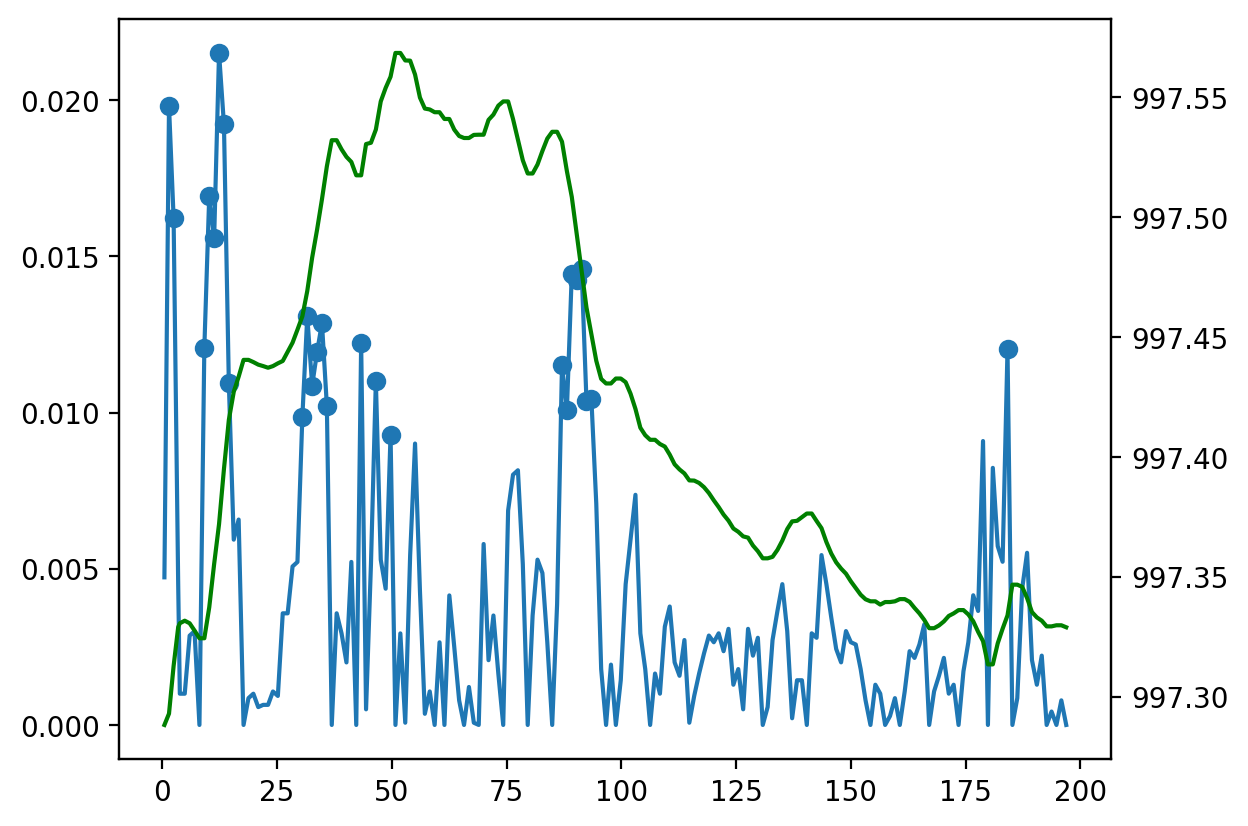

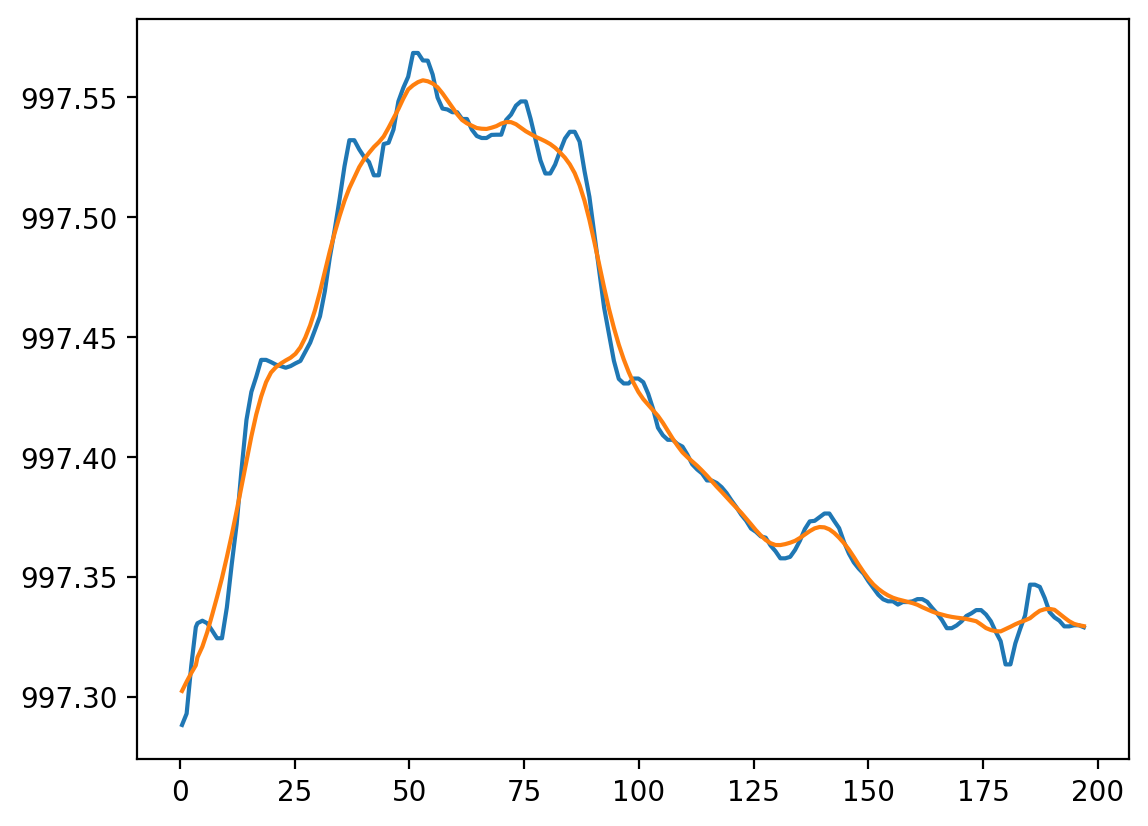

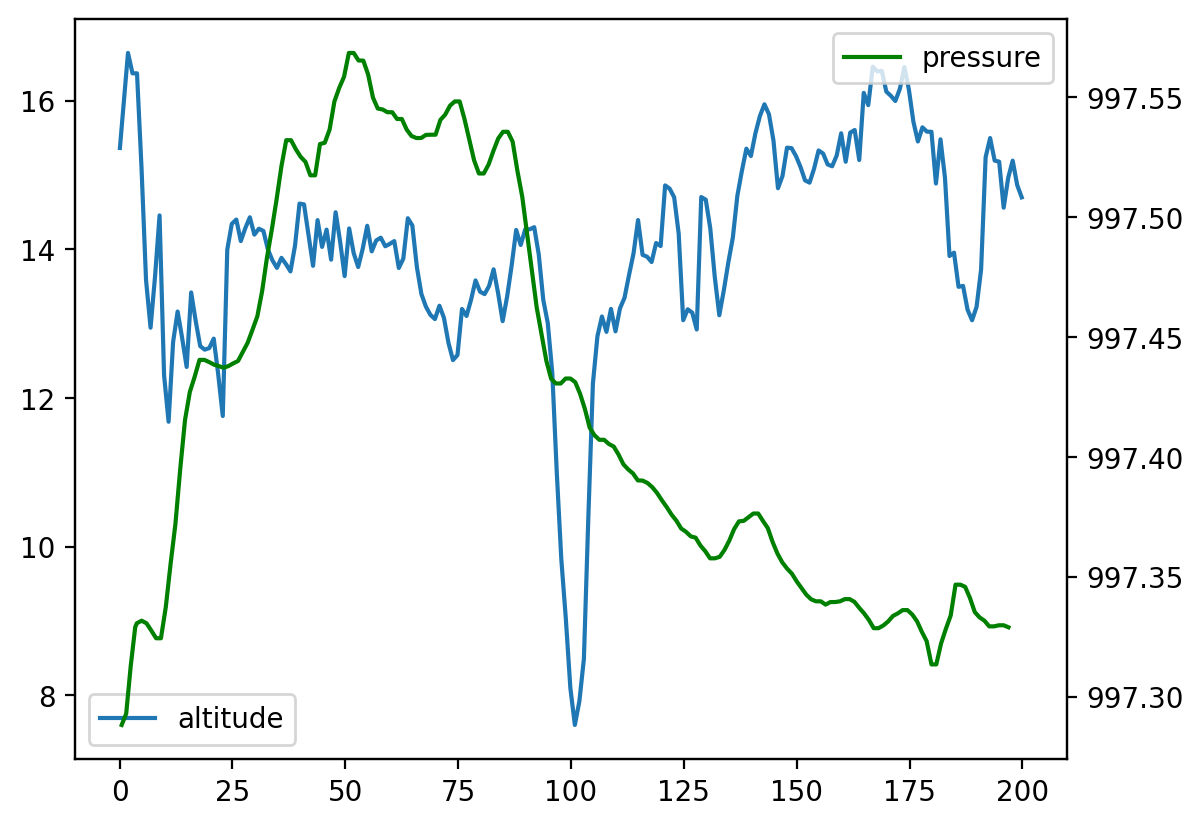

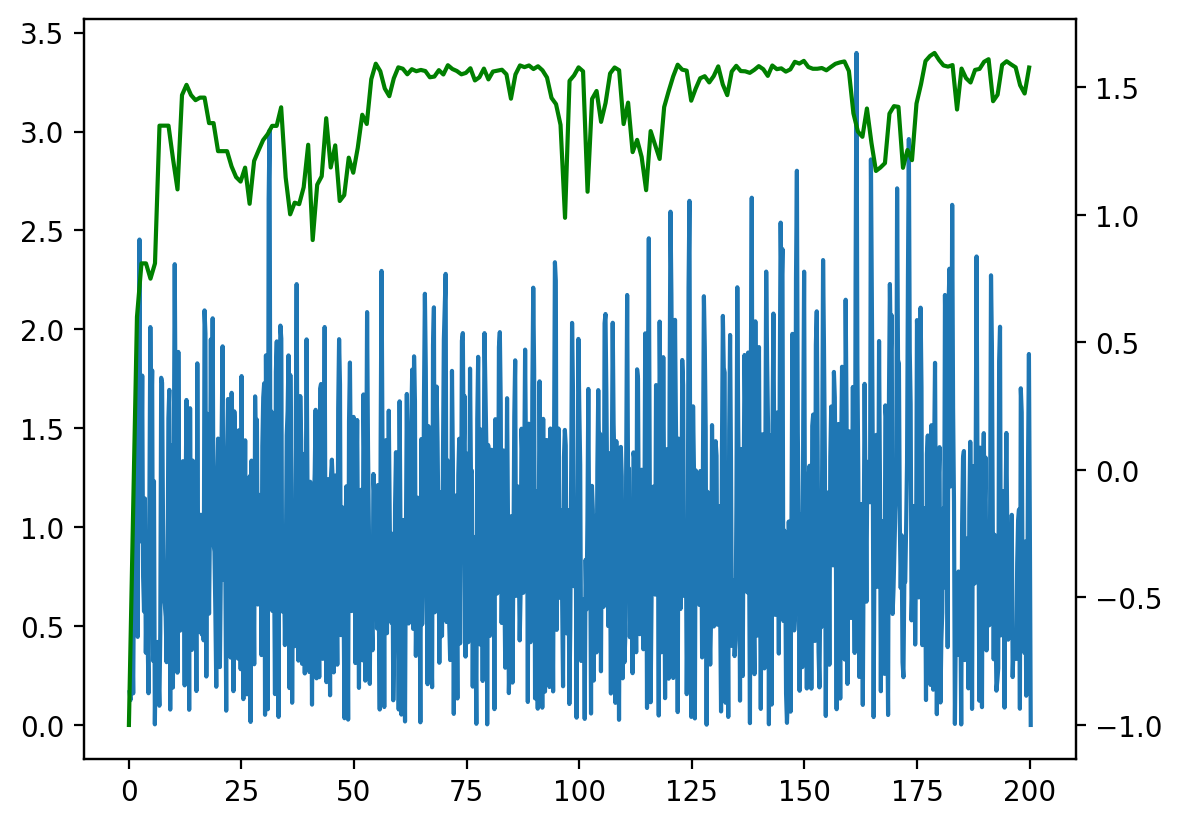

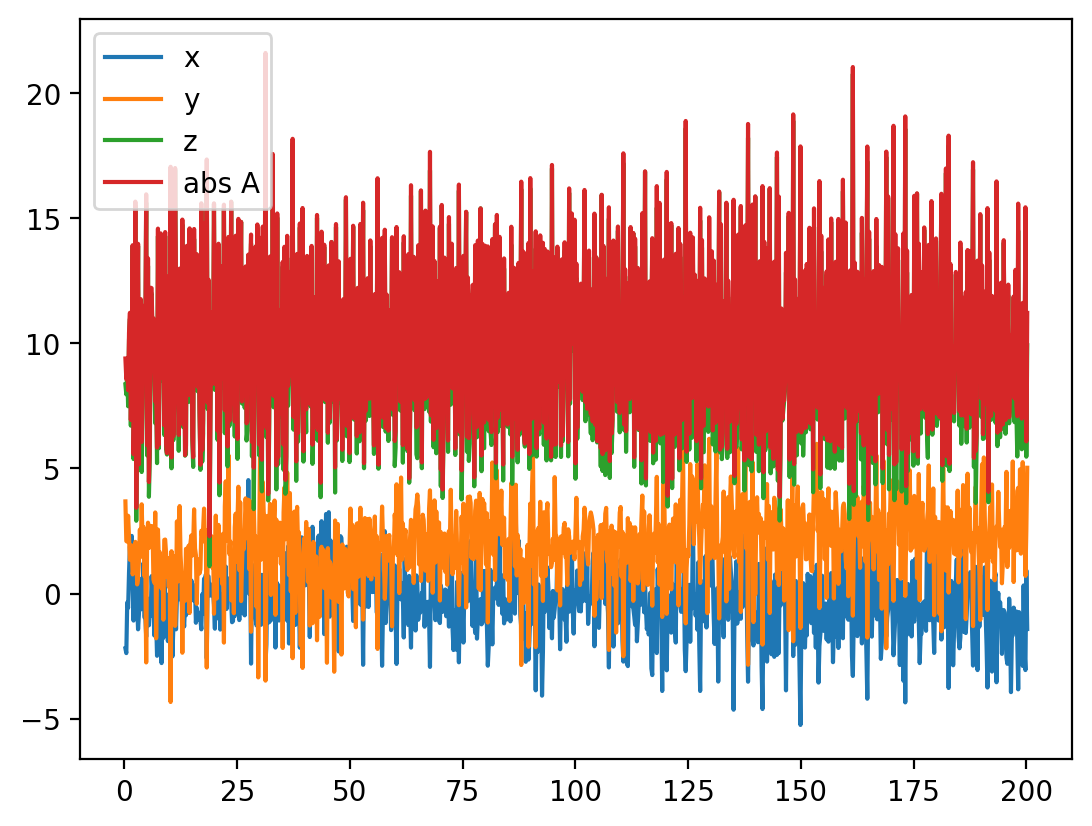

In [13]:
#Plotting data
fig, ax = plt.subplots()
fig.set_dpi(200)
# ax.plot(abs_t,abs)
ax.plot(bar_time,der_p)
ax.scatter(range_t,range_p)
ax2 = ax.twinx()
ax2.plot(bar_time,bar,color='green')
plt.show()

fig1, ax1 = plt.subplots()
fig1.set_dpi(200)
ax1.plot(bar_time,bar)
ax1.plot(bar_time,reduce_bar)
plt.show()

fig2, ax3 = plt.subplots()
fig2.set_dpi(200)
ax3.plot(gps_time,altitude, label="altitude")
ax3.legend()
ax4 = ax3.twinx()
ax4.plot(bar_time,bar,color='green',label="pressure")
ax4.legend()
plt.show()

fig4,ax6 = plt.subplots()
fig4.set_dpi(200)
ax6.plot(at,deri_a)
ax7 = ax6.twinx()
ax7.plot(gps_time,gps_speed,color='green')
# ax8 = ax7.twinx()
# ax8.plot(new_at,newDeri,color="orange")
plt.show()

fig3 ,ax5 = plt.subplots()
fig3.set_dpi(200)
ax5.plot(at,a_x,label="x")
ax5.plot(at,ay,label="y")
ax5.plot(at,az,label="z")
ax5.plot(at,aa,label="abs A")
#ax5.plot(at,deri_a,label="speed")
plt.legend()
plt.show()